# TP matematicas 3

#### prediccion del precio de BINANCECOIN utilizando algortimo de regresion lineal

obtuve un dataSet dado por la pagina https://www.kaggle.com/datasets/varpit94/binancecoin-data el cual contiene datos de la historia de la cryptomoneda Binance coin, la idea es generar una prediccion del cierre del precio de un mismo dia por medio de el metodo de regresion lineal

In [49]:
#importamos librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [50]:
#imporatamos el csv con los datos y lo convertimos a dataset de panda
data_set_bnb = pd.read_csv("BNB-USD.csv")
data_set_bnb.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,2.05314,2.17423,1.89394,1.99077,1.99077,19192200
1,2017-11-10,2.00773,2.06947,1.64478,1.79684,1.79684,11155000
2,2017-11-11,1.78628,1.91775,1.61429,1.67047,1.67047,8178150
3,2017-11-12,1.66889,1.67280,1.46256,1.51969,1.51969,15298700
4,2017-11-13,1.52601,1.73502,1.51760,1.68662,1.68662,12238800


## Informacion de los datos


Los valores son dados en dolares

date: es la fecha (en este caso año mes y dia)


open: es el precio con el que empezo la crypto en el dia


high: es el precio maximo al que llego en el dia


low: es el precio minimo al que llego en el dia


close: es el precio con el que cerro el dia


volume: es la canitdad en USD de transacciones echas por operadores (compra y venta de la crypto).


#### exploracion de datos

In [51]:
data_set_bnb['Date'].dtype

dtype('O')

In [52]:
data_set_bnb.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1.660000e+03
mean,129.697342,134.406136,124.550295,129.843849,129.843849,9.488055e+08
std,187.831063,194.272600,180.550038,187.766836,187.766836,1.512638e+09
min,1.511360,1.582660,1.462560,1.510360,1.510360,9.284000e+03
25%,13.369231,13.855870,12.907175,13.377052,13.377052,1.057140e+08
50%,21.058666,21.975200,20.389466,21.052774,21.052774,2.862741e+08
75%,287.526466,302.836242,266.426819,288.547340,288.547340,1.441668e+09
max,676.315918,690.931946,634.549500,675.684082,675.684082,1.798295e+10


In [53]:
#comprobamos si hay valores faltantes
data_set_bnb.isnull().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

modificamos el datframe para el objetivo propuesto

In [54]:
#eliminamos columna que no nos interesa
del data_set_bnb['Adj Close']
data_set_bnb.head()

,Date,Open,High,Low,Close,Volume
0,2017-11-09,2.05314,2.17423,1.89394,1.99077,19192200
1,2017-11-10,2.00773,2.06947,1.64478,1.79684,11155000
2,2017-11-11,1.78628,1.91775,1.61429,1.67047,8178150
3,2017-11-12,1.66889,1.67280,1.46256,1.51969,15298700
4,2017-11-13,1.52601,1.73502,1.51760,1.68662,12238800


In [55]:
from datetime import datetime

#trasnformamos de stirng a date
data_set_bnb['Date'] = pd.to_datetime(data_set_bnb['Date'],format='%Y-%m-%d')

#pasamos como indice la columna datos
data_set_bnb.set_index('Date', inplace=True)
data_set_bnb.sort_index(inplace=True)
data_set_bnb.head()


,Open,High,Low,Close,Volume
Date,,,,,
2017-11-09,2.05314,2.17423,1.89394,1.99077,19192200
2017-11-10,2.00773,2.06947,1.64478,1.79684,11155000
2017-11-11,1.78628,1.91775,1.61429,1.67047,8178150
2017-11-12,1.66889,1.67280,1.46256,1.51969,15298700
2017-11-13,1.52601,1.73502,1.51760,1.68662,12238800


### matriz de correlacion de los datos

<AxesSubplot:>

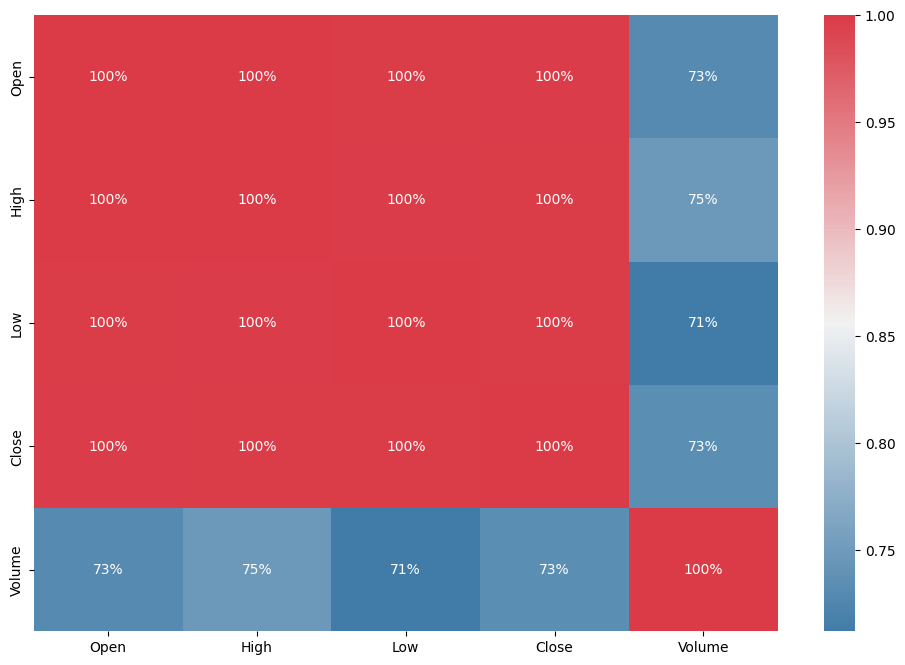

In [56]:
corr = data_set_bnb.corr()
plt.subplots(figsize=(12,8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, fmt='.0%',
            cmap=sns.diverging_palette(240, 10, as_cmap=True)) 

Podemos observar en el grafico que nuestra variable dependiente CLOSE tiene un 100% de correlacion contra open, high y low y 73% con volume.
El problema es que Open, High, Low y volume tiene un porcentaje muy alto de correlacion entre ellas
y eso entorpecería el algoritmo, por lo que creo mas conveniente utilizar unicamente Open como variable independiente y aplicar el algoritmo de regresion lineal simple

In [57]:
#utilizamos solo open como variable dependiente ya que las demas variables independientes tienen mucha correlaciin entre si y entorpecen el algoritmo
X = data_set_bnb[['Open']].values
Y = data_set_bnb['Close'].values

In [58]:
#utilizamos el 40% de los datos para el test y el restante para entrenar a la IA
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.40,random_state=0) 
print(train_x[:10],'\n',train_y[:10])

[[ 17.249006]
 [442.40625 ]
 [ 10.2914  ]
 [ 17.112799]
 [281.133942]
 [  4.921514]
 [ 17.54722 ]
 [ 29.765539]
 [ 28.891996]
 [416.7966  ]] 
 [ 16.841007 435.401367  10.0359    18.135199 279.438049   4.52865
  17.565874  30.658192  30.391291 399.063446]


entrenamos el modelo

In [59]:
regressor = LinearRegression()
regressor.fit(train_x,train_y)

LinearRegression()

### chequeamos la prediccion del modelo

In [60]:
pred = regressor.predict(test_x)

In [61]:
comparationPredDF = pd.DataFrame({'real':test_y,'predicted':pred})
comparationPredDF.head(15)

,real,predicted
0,568.470520,534.202571
1,9.904470,10.589925
2,5.180580,5.666169
3,19.142689,19.278087
4,221.680435,235.067136
5,40.857571,39.102153
6,304.335968,325.842348
7,6.640054,6.872898
8,23.591930,22.478074
9,385.818970,390.670112


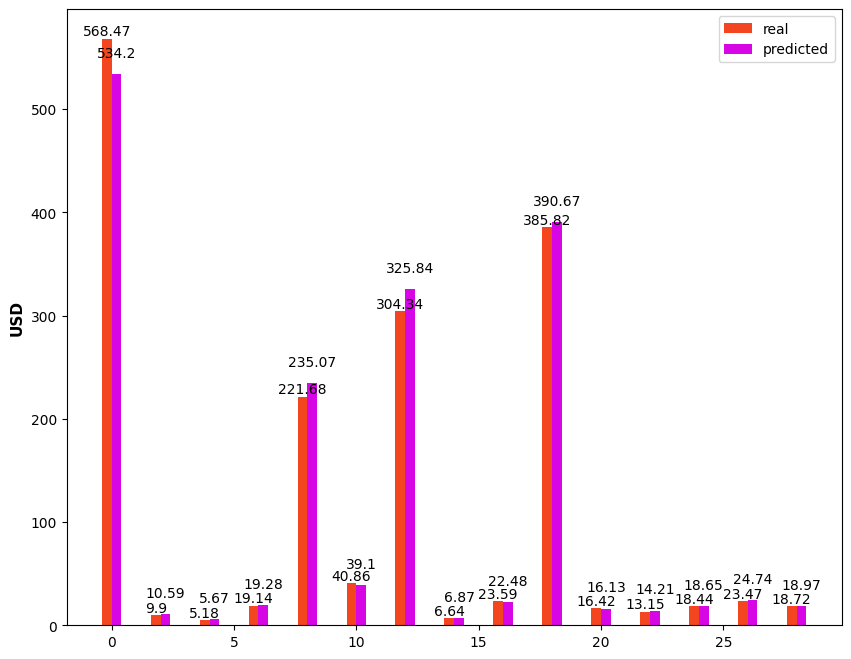

In [62]:
CANTROWS = 15
DF = np.round(comparationPredDF.head(CANTROWS), decimals = 2)
WIDTHBARS = 0.4
FONTLABELS = {'fontsize':11,'fontweight':'bold'}
#le damos cordenadas en x y las mutliplicamos para que halla mas espacio entre barras
coordinates = np.arange(CANTROWS)*2
#creamos la figure y el axes
fig= plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1,1,1)
containBar1 = ax.bar(coordinates-(WIDTHBARS/2),DF['real'],width  = WIDTHBARS, color = "#F34520",label ="real")
#bar of product2
containBar2 = ax.bar(coordinates+(WIDTHBARS/2),DF['predicted'],width  = WIDTHBARS, color = "#D706E4",label ="predicted")
ax.bar_label(containBar1,DF['real'])
ax.bar_label(containBar2,DF['predicted'],padding = 10)
ax.set_ylabel("USD",fontdict = FONTLABELS)

plt.legend()
plt.show()

generamos la recta creada por nuestro algoritmo ya que terminamos concluyendo que lo mejor era utilizar
regresion lineal simple

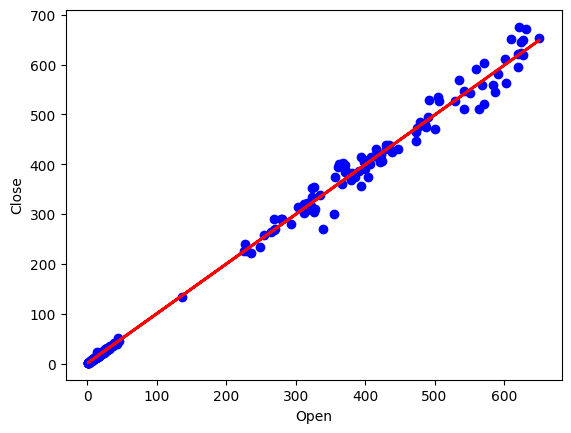

In [63]:
plt.scatter(test_x, test_y,  color='blue')
plt.plot(test_x, pred, color='red', linewidth=2)
plt.xlabel("Open")
plt.ylabel("Close")
plt.show()

In [64]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(test_y, pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y,pred )))
#procentaje de error promedio absoluto si el valor es 0 el algoritmo es muy efectivo, 1 es mediocre
print('mean absolute percentage error:',metrics.mean_absolute_percentage_error(test_y,pred))

Mean Absolute Error: 5.496715772508622
Mean Squared Error: 147.71877566833484
Root Mean Squared Error: 12.15396131589758
mean absolute percentage error: 0.05448450066478716


la raiz de error cuadratico medio es de 11.37, esto es ligeramente inferior a 9% del valor de la media de cierre de la moneda, que es un porcentaje de error aceptable.

### graficamos comparacion entre valores reales y valores predecidos

<AxesSubplot:title={'center':'Predicted vs actual closing price comparation (2020-2022)'}, xlabel='date', ylabel='USD'>

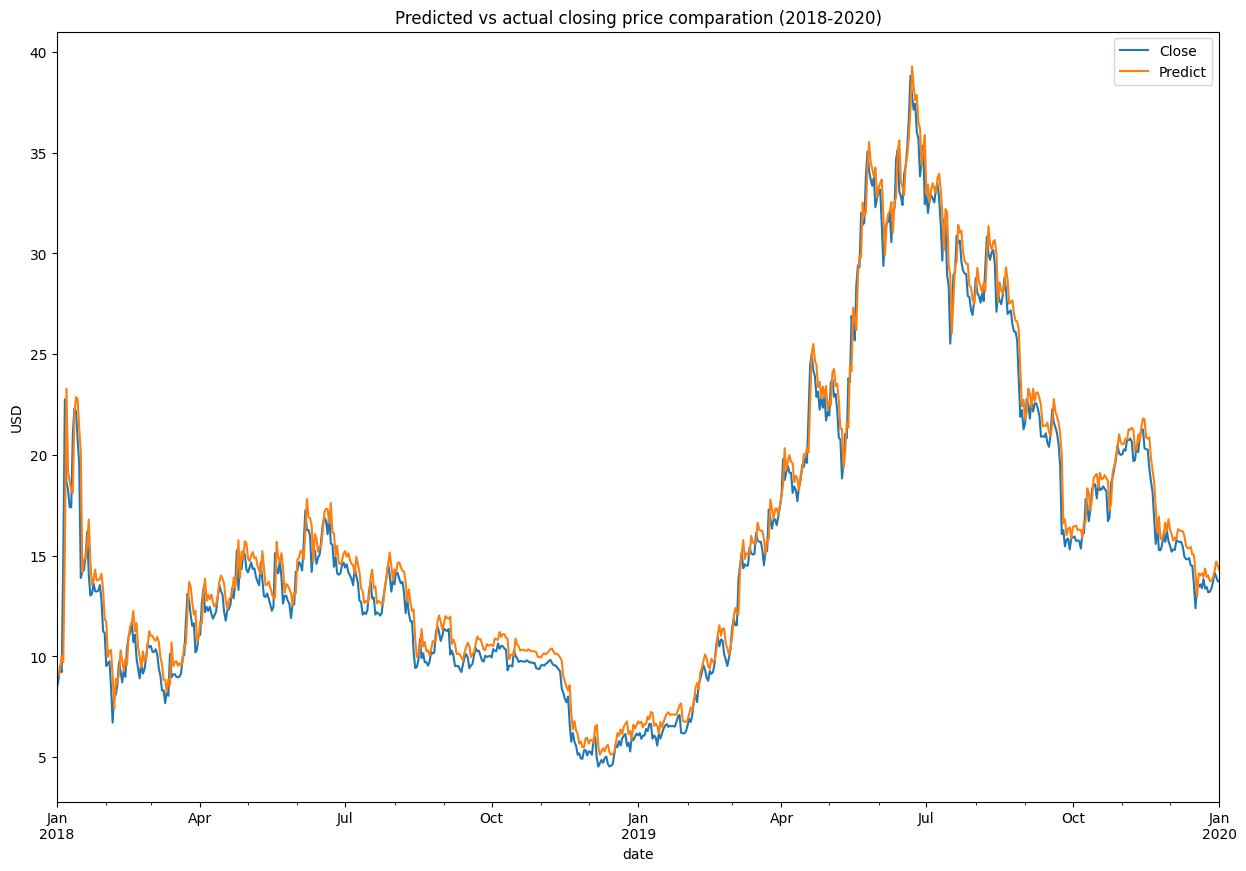

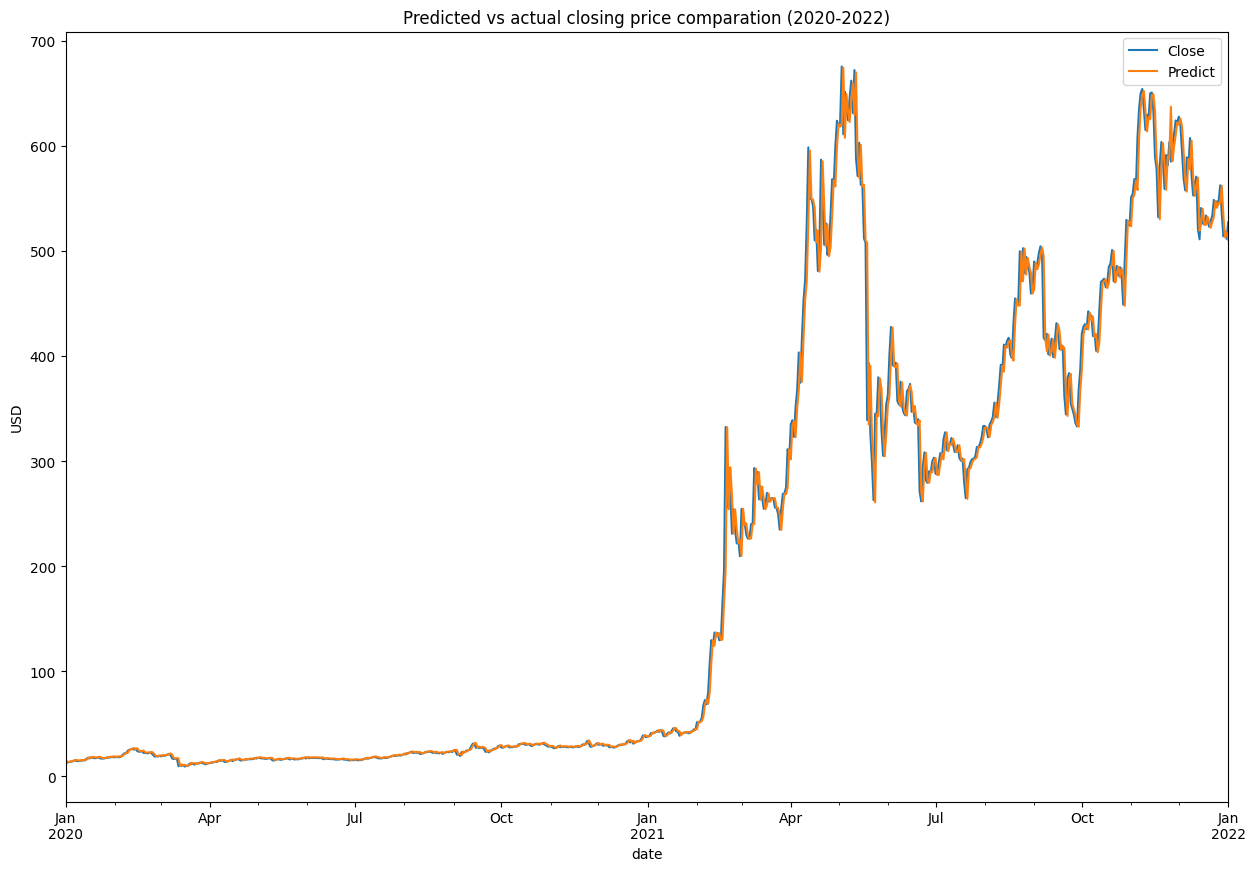

In [65]:
from datetime import date
predicted = regressor.predict(X)

dfComparation = pd.DataFrame(data_set_bnb['Close'])
dfComparation['Predict'] = predicted

dfComparation[date(2018,1,1):date(2020,1,1)].plot(title = "Predicted vs actual closing price comparation (2018-2020)",
              ylabel = 'USD',xlabel = 'date',figsize = (15,10))
dfComparation[date(2020,1,1):date(2022,1,1)].plot(title = "Predicted vs actual closing price comparation (2020-2022)",
              ylabel = 'USD',xlabel = 'date',figsize = (15,10))      

#### conclucion

la prediccion dada por el algoritmo es aceptable ya que una gran parte de los datos fueron descartados pero esto no significa que vaya a ser peor ya que como explique mas arriba al estar los datos independientes tan correlacionados entre si entorpeceria las predicciones finales.
Claramente el mercado que se genero con las cryptos no esta atado a unicamente valores estadisticos si no tambien a sencaciones y sentimientos de sus operantes que juegan un rol extremadamente importante en el cambio de precio de las monedas.
un ejemplo muy reciente es el de el magnate elon musk... que por medio de la red social twitter aviso que decidio quitar la posibilidad de comprar sus autos tesla con BTC y que sacaria todos sus fondos de esta crypto y en consecuencia BTC de estar en su valor mas alto alrededor de 65k paso a caer a 24k aproximadamente.